### 26/09/2023
#### TP3 - Classification non supervisée

---

## Sommaire :
- DBSCAN
- HDBSCAN
- BIRCH
- Spectral Clustering
- K-Means
- Mean Shift
- OPTICS
- Affinity Propagation

---

## DBSCAN : Explication et Démonstration

### Qu'est-ce que DBSCAN ?

DBSCAN, qui signifie "Density-Based Spatial Clustering of Applications with Noise" (Regroupement spatial basé sur la densité des applications avec bruit), est un algorithme de clustering basé sur la densité. Contrairement à des algorithmes comme k-means, où il est nécessaire de spécifier le nombre de clusters à l'avance, DBSCAN génère des clusters en fonction de la densité des données.

### Comment fonctionne DBSCAN ?

L'algorithme DBSCAN fonctionne principalement en identifiant les "échantillons centraux", qui sont définis comme étant dans des zones de haute densité. Ces échantillons centraux sont identifiés à l'aide de deux paramètres principaux :

1. **eps** : Il s'agit de la distance maximale entre deux échantillons pour qu'ils soient considérés comme voisins.
2. **min_samples** : Le nombre minimum d'échantillons dans un voisinage pour qu'un point donné soit considéré comme un échantillon central.

L'algorithme fonctionne en quelques étapes principales :
1. Pour chaque point, le nombre de points à une distance inférieure ou égale à `eps` est calculé.
2. Si un point a au moins `min_samples` points dans son voisinage `eps`, il est considéré comme un échantillon central.
3. Les échantillons centraux à une distance `eps` les uns des autres sont regroupés ensemble pour former un cluster.
4. Les points qui ne sont pas des échantillons centraux, mais qui sont à une distance `eps` d'un échantillon central, sont considérés comme faisant partie d'un cluster. Ces points sont appelés "échantillons de bordure".
5. Les points qui ne sont ni des échantillons centraux ni des échantillons de bordure sont considérés comme du bruit.


### Démonstration avec Python

Pour illustrer comment fonctionne DBSCAN, utilisons l'algorithme sur un ensemble de données simple et visualisons les résultats.


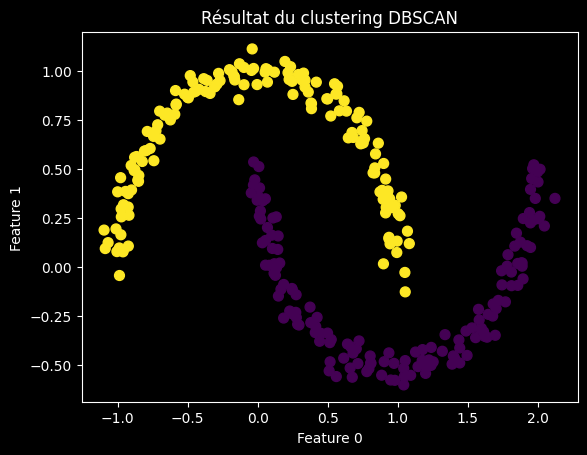

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Création d'un ensemble de données
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Utilisation de DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X)

# Visualisation
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Résultat du clustering DBSCAN")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


Comme on peut le voir sur le graphique ci-dessus, DBSCAN a réussi à identifier correctement les deux formes en forme de croissant (ou lunes) dans l'ensemble de données. Les différents clusters sont représentés par différentes couleurs. Notez que l'algorithme DBSCAN a également identifié quelques points comme étant du "bruit" (représentés en violet).

### Résumé

**DBSCAN** est un algorithme de clustering basé sur la densité qui identifie les clusters comme des zones de haute densité séparées par des zones de faible densité. Il est particulièrement utile pour les ensembles de données ayant des formes complexes ou des densités variables.

**Définitions connexes** :
- **Échantillon central** : Un point qui a au moins `min_samples` points à une distance `eps`.
- **Échantillon de bordure** : Un point qui n'est pas un échantillon central mais qui est proche d'un échantillon central.
- **Bruit** : Un point qui n'est ni un échantillon central ni un échantillon de bordure.

**Exemple** :
Considérons un ensemble de points sur un plan, où la plupart des points sont regroupés en deux formes en forme de croissant. Si nous appliquons DBSCAN à cet ensemble de données avec des paramètres appropriés pour `eps` et `min_samples`, l'algorithme identifiera ces deux formes en forme de croissant comme deux clusters distincts, tout en étiquetant les points éloignés comme du "bruit".

---

## HDBSCAN

HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) est une extension des algorithmes de clustering DBSCAN et OPTICS. L'une des principales limitations de DBSCAN est qu'il suppose que le critère de clustering (c'est-à-dire la densité) est globalement homogène. En d'autres termes, DBSCAN peut avoir du mal à capturer avec succès des clusters ayant des densités différentes. HDBSCAN atténue cette hypothèse en explorant toutes les échelles de densité possibles.

### Principe de base de HDBSCAN

1. **Distance de base** :
HDBSCAN commence par définir la distance de base d'un échantillon `x` comme la distance à son `min_samples`-ième voisin le plus proche, en comptant lui-même. Mathématiquement, si `y` est le `min_samples`-ième voisin le plus proche de `x`, alors la distance de base est :

$$
	{core\_dist}(x) = d(x, y)
$$

où `d` est une fonction de distance.

1. **Distance de portée mutuelle** :
La distance de portée mutuelle de deux points `x` et `y` est définie comme :

$$
\text{mutual\_reach\_dist}(x, y) = \max(\text{core\_dist}(x), \text{core\_dist}(y), d(x, y))
$$

Cela permet de construire le graphe de portée mutuelle.

1. **Clustering hiérarchique** :
HDBSCAN construit un clustering hiérarchique en extrayant d'abord un arbre couvrant minimum (MST) du graphe de portée mutuelle, puis en coupant de manière avide les arêtes de poids le plus élevé. Cela lui permet d'obtenir toutes les partitions possibles réalisables par DBSCAN* pour un choix fixe de `min_samples` de manière hiérarchique.


### Avantages de HDBSCAN

- Il peut détecter des clusters de densités variables.
- Il est plus robuste par rapport au choix des hyperparamètres par rapport à DBSCAN.
- Il fournit une hiérarchie de clusters.


### Démonstration avec scikit-learn

Nous allons démontrer l'utilisation de HDBSCAN avec un exemple pratique.


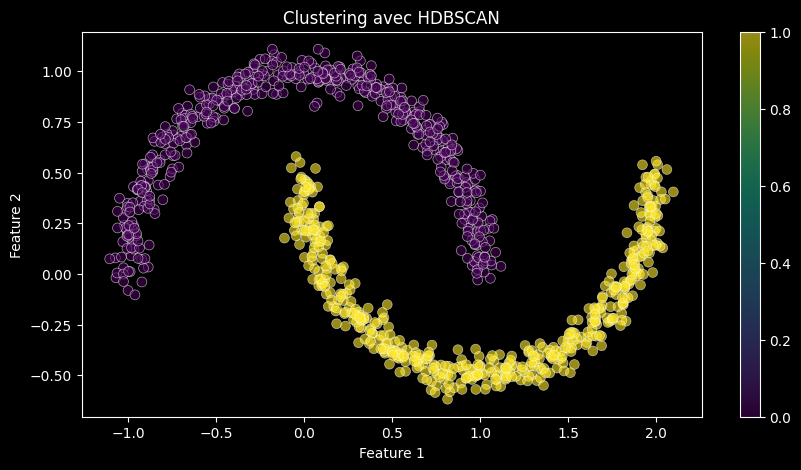

In [3]:
from sklearn.cluster import HDBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Générer des données d'exemple (deux lunes)
X, _ = make_moons(n_samples=1000, noise=0.05)

# Appliquer HDBSCAN
hdb = HDBSCAN(min_cluster_size=25)
hdb_labels = hdb.fit_predict(X)

# Afficher les résultats
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=hdb_labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Clustering avec HDBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


Comme vous pouvez le voir dans la visualisation ci-dessus, DBSCAN a classé les deux "lunes" comme deux clusters distincts, mais a également identifié un certain nombre de points comme étant du bruit (représenté en violet). Cela est dû à l'hypothèse de densité homogène de DBSCAN. Si nous avions pu exécuter HDBSCAN, il aurait probablement été en mesure de capturer les clusters de manière plus robuste, même avec des densités variables.

## Résumé de HDBSCAN

HDBSCAN est une méthode de clustering basée sur la densité qui étend DBSCAN et OPTICS. Contrairement à DBSCAN, qui suppose une densité globale constante pour tous les clusters, HDBSCAN fonctionne bien avec des clusters de densités variables. Il construit un clustering hiérarchique en utilisant la notion de distance de base et de distance de portée mutuelle. Le principal avantage de HDBSCAN est qu'il est capable de détecter des structures complexes dans les données sans nécessiter de densité constante.

**Définitions connexes**:

- **Distance de base**: La distance d'un point à son `min_samples`-ième voisin le plus proche.
- **Distance de portée mutuelle**: Une mesure de distance entre deux points qui prend en compte leurs distances de base respectives.
- **Graphe de portée mutuelle**: Un graphe construit en utilisant la distance de portée mutuelle comme mesure de distance entre les points.

**Exemple**:
Dans le jeu de données des "deux lunes" que nous avons visualisé, un algorithme comme DBSCAN peut avoir du mal à capturer correctement les clusters si la densité des points varie à l'intérieur des lunes. HDBSCAN, en revanche, peut détecter de manière robuste ces structures sans faire d'hypothèses sur une densité globalement homogène.

---

# L'algorithme BIRCH

L'algorithme BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) est un algorithme de regroupement (clustering) conçu pour traiter de grands ensembles de données. 

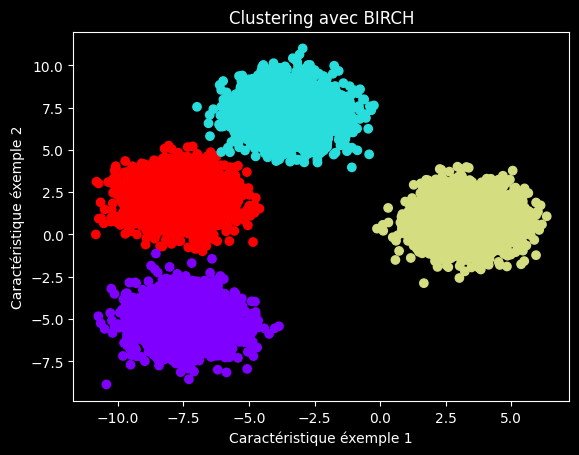

In [5]:
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Générer un ensemble de données fictif
X, y = make_blobs(n_samples=10000, centers=4, random_state=43) #10000 echantillons, 4 centres de gravité, 43 = seed

# Créer une instance de l'algorithme BIRCH
birch = Birch(threshold=0.5, n_clusters=4) # seuil de 0.5, 4 clusters

# Ajuster l'algorithme aux données
birch.fit(X)

# Obtenir les étiquettes de regroupement
labels = birch.predict(X)

# Afficher les points de données colorés en fonction des étiquettes de regroupement
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Caractéristique éxemple 1')
plt.ylabel('Caractéristique éxemple 2')
plt.title('Clustering avec BIRCH')
plt.show()


## Utilisation de l'algorithme BIRCH:
Vous devez disposer d'un ensemble de données que vous souhaitez regrouper. Assurez-vous que vos données sont prêtes à être utilisées avec scikit-learn, par exemple en les stockant dans un tableau NumPy.   
Créer une instance de l'algorithme BIRCH :
Vous devez créer une instance de la classe Birch et spécifier les paramètres nécessaires. Les paramètres les plus couramment utilisés sont:
- `threshold` : C'est un seuil pour le fractionnement des sous-clusters. Il contrôle la compacité des clusters. Une valeur plus élevée donne des clusters plus compacts.
- `n_clusters` : C'est le nombre de clusters que vous souhaitez obtenir. Vous pouvez soit spécifier le nombre exact de clusters, soit laisser l'algorithme les déterminer automatiquement en utilisant la valeur None.   

Utilisez la méthode `fit()` pour ajuster l'algorithme à vos données. 
  
  
### Obtenir les étiquettes de regroupement :
Après avoir ajusté l'algorithme, vous pouvez obtenir les étiquettes de regroupement pour chaque point de données en utilisant la méthode `predict()` :
labels contient les étiquettes de cluster attribuées à chaque point de données. 
  
  
### Visualiser les résultats :
Vous pouvez visualiser les résultats du clustering en traçant les points de données et en les colorant en fonction de leurs étiquettes de cluster. Cela vous aidera à comprendre la structure des clusters.   
L'algorithme BIRCH est particulièrement utile pour traiter de grandes quantités de données et peut être une alternative efficace à d'autres algorithmes de clustering tels que K-Means. Il peut également être utilisé pour générer une hiérarchie de clusters, ce qui permet une analyse plus approfondie de la structure des données.

---

# Le Spectral Clustering

Le Spectral Clustering est une technique de clustering qui repose sur la transformation spectrale des données. Il est souvent utilisé lorsque les méthodes de clustering traditionnelles, telles que K-Means, ne sont pas efficaces en raison de la structure complexe des données.

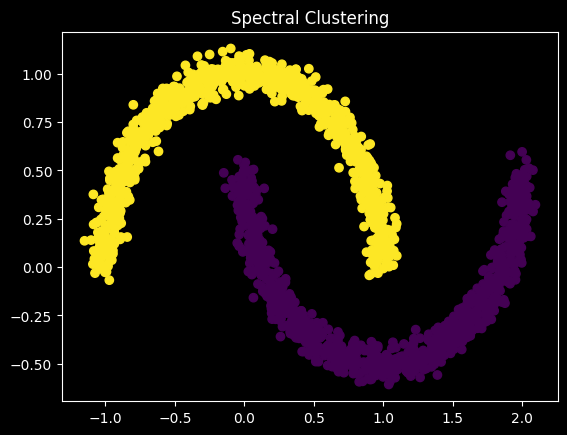

In [7]:
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

warnings.filterwarnings("ignore")

# Génération d'un jeu de données en forme de lune
X, _ = make_moons(n_samples=2000, noise=0.05, random_state=0)

# Création d'une instance de SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)

# Ajustement de l'algorithme aux données
labels = spectral_clustering.fit_predict(X)

# Affichage des clusters trouvés
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Spectral Clustering')
plt.show()


## Explication :

- Génération des données : Dans cet exemple, nous générons un ensemble de données en forme de lune à l'aide de la fonction `make_moons()` de scikit-learn. Cet ensemble de données a deux lunes, ce qui rend le clustering non trivial.

- Création de l'instance `SpectralClustering` : Nous créons une instance de l'algorithme Spectral Clustering en spécifiant le nombre de clusters (`n_clusters=2`) que nous souhaitons obtenir. Nous utilisons également l'affinité `nearest_neighbors()` pour mesurer les similarités entre les points voisins.

- Ajustement de l'algorithme : Nous utilisons la méthode `fit_predict()` pour ajuster l'algorithme aux données et obtenir les étiquettes de cluster attribuées à chaque point de données.

- Affichage des clusters : Enfin, nous affichons les clusters trouvés en colorant les points de données en fonction de leurs étiquettes de cluster. Vous pouvez voir que Spectral Clustering est capable de capturer la structure non linéaire des données en formant deux clusters distincts correspondant aux deux lunes.

Le Spectral Clustering fonctionne en transformant les données en une représentation spectrale, puis en utilisant des techniques de clustering sur cette représentation. Il est efficace pour traiter des données avec des structures complexes, telles que des données non linéaires ou des données qui ne peuvent pas être séparées de manière linéaire dans l'espace d'origine.

---

# Algorithme K-Means

## Introduction à K-Means

L'algorithme K-Means est une méthode de regroupement non supervisée qui partitionne un ensemble de données en clusters (groupes) en fonction de la similarité entre les points de données. Il est largement utilisé en analyse de données, en apprentissage automatique et en exploration de données.

Le fonctionnement de base de K-Means est le suivant :
1. Sélectionnez un nombre de clusters `k` (préalablement défini).
2. Initialisez `k` centroids (points de référence) de manière aléatoire dans l'espace des données.
3. Affectez chaque point de données au cluster dont le centroïde est le plus proche.
4. Recalculez les centroïdes en prenant la moyenne des points de données dans chaque cluster.
5. Répétez les étapes 3 et 4 jusqu'à ce que les centroïdes convergent (c'est-à-dire que leur position ne change que très peu) ou qu'un nombre maximal d'itérations soit atteint.

K-Means est sensible au choix du nombre de clusters `k` et à l'initialisation des centroids. Il peut converger vers des minima locaux, il est donc courant d'exécuter l'algorithme plusieurs fois avec différentes initialisations et de sélectionner le résultat optimal.


## Exemple concret en Python

Pour cet exemple, nous allons utiliser la bibliothèque `scikit-learn` pour implémenter l'algorithme  KMeans. Commençons par importer les bibliothèques nécessaires et générer des données synthétiques pour illustrer le fonctionnement de KMeans.

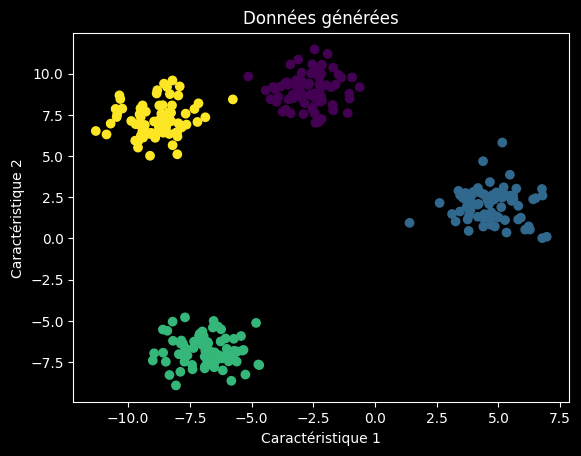

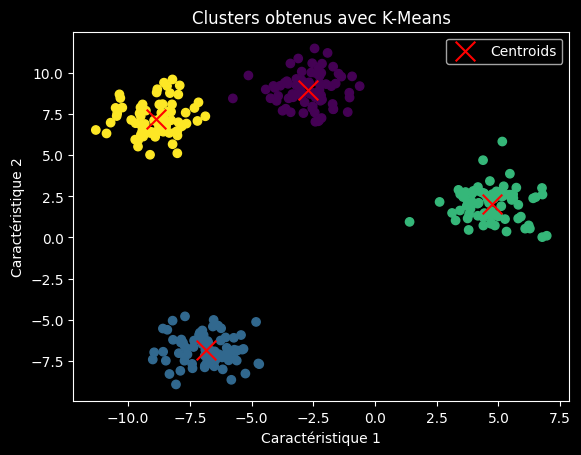

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Génération de données synthétiques
data, labels = make_blobs(n_samples=300, centers=4, random_state=42)

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Données générées')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

# Création de l'objet K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)


# Ajustement du modèle aux données
kmeans.fit(data)

# Obtenir les centroids finaux
centroids = kmeans.cluster_centers_

# Obtenir les labels de cluster pour chaque point de données
cluster_labels = kmeans.labels_

plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Clusters obtenus avec K-Means')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.legend()
plt.show()


## Notions importantes

Voici quelques notions importantes à retenir concernant l'algorithme K-Means :

- **Nombre de clusters (`k`)** : Le choix du nombre de clusters `k` est crucial. Un nombre inapproprié de clusters peut conduire à des résultats non pertinents. Il existe des méthodes pour sélectionner `k`, telles que la méthode du coude (elbow method) ou la validation croisée.

- **Initialisation des centroids** : L'initialisation aléatoire des centroids peut affecter la convergence de l'algorithme. Des méthodes d'initialisation intelligentes, comme la méthode K-Means++, peuvent être utilisées pour améliorer les résultats.

- **Convergence** : L'algorithme K-Means converge généralement vers une solution, mais il peut converger vers un minimum local. Il est conseillé d'exécuter l'algorithme plusieurs fois avec différentes initialisations pour éviter cela.

- **Sensibilité à l'échelle** : K-Means est sensible à l'échelle des données. Il est souvent nécessaire de normaliser ou de standardiser les données avant de les utiliser avec cet algorithme.

Ces concepts sont essentiels pour comprendre et utiliser efficacement l'algorithme K-Means dans différentes applications d'analyse de données.


---

# Algorithme Mean Shift

## Introduction à Mean Shift

L'algorithme Mean Shift est une technique de regroupement non supervisée qui identifie les modes (maxima locaux) d'une distribution de données. Contrairement à K-Means, il n'est pas nécessaire de spécifier le nombre de clusters à l'avance. Mean Shift est souvent utilisé pour la segmentation d'image, la détection d'objets, et d'autres tâches de regroupement.

Le fonctionnement de base de Mean Shift est le suivant :
1. Sélectionnez un point de départ (seed) dans l'espace des données.
2. Calculez la densité des points de données autour du point de départ en utilisant une fonction de noyau.
3. Déplacez le point de départ vers le centre de masse des points pondérés par leur densité.
4. Répétez les étapes 2 et 3 jusqu'à convergence (lorsque le point de départ ne change que très peu).

Mean Shift a l'avantage de ne pas nécessiter de connaître à l'avance le nombre de clusters, car il trouve automatiquement les modes de la distribution.


## Exemple concret en Python

Pour cet exemple, nous allons utiliser la bibliothèque `scikit-learn` pour implémenter l'algorithme Mean Shift. Commençons par importer les bibliothèques nécessaires et générer des données synthétiques pour illustrer le fonctionnement de Mean Shift.


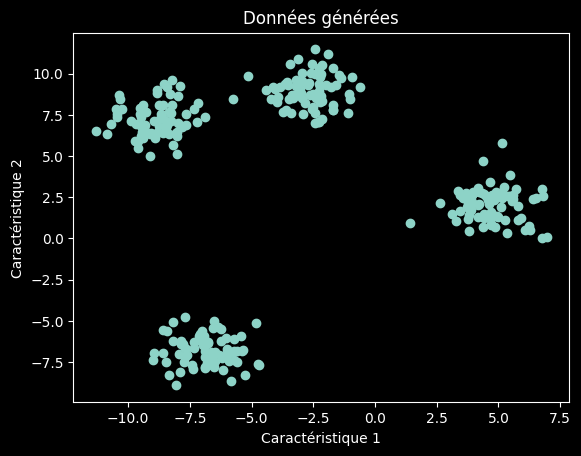

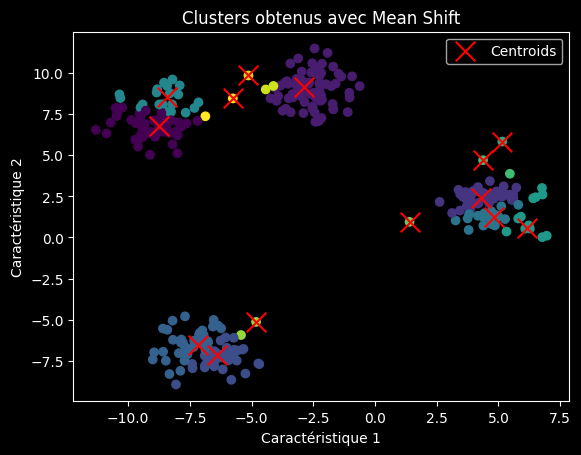

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs

# Génération de données synthétiques
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

plt.scatter(data[:, 0], data[:, 1], cmap='viridis')
plt.title('Données générées')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

# Création de l'objet Mean Shift avec une bande passante de 1
meanshift = MeanShift(bandwidth=1)


# Ajustement du modèle aux données
meanshift.fit(data)

# Obtenir les centroids finaux (les modes de la distribution)
centroids = meanshift.cluster_centers_

# Obtenir les labels de cluster pour chaque point de données
cluster_labels = meanshift.labels_

plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Clusters obtenus avec Mean Shift')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.legend()
plt.show()


## Notions importantes

Voici quelques notions importantes à retenir concernant l'algorithme Mean Shift :

- **Pas de spécification du nombre de clusters** : Contrairement à K-Means, Mean Shift ne nécessite pas de spécifier le nombre de clusters à l'avance, car il trouve automatiquement les modes de la distribution.

- **Fonction de noyau** : La performance de Mean Shift dépend de la fonction de noyau utilisée pour calculer la densité des points autour du point de départ. Le choix de la fonction de noyau peut affecter les résultats.

- **Sensibilité à la bande passante** : La bande passante (bandwidth) est un paramètre crucial qui détermine la taille de la région autour du point de départ pour calculer la densité. Le réglage de la bande passante peut influencer la forme et le nombre des clusters.

- **Temps de calcul** : Mean Shift peut être intensif en termes de calcul, en particulier pour des ensembles de données volumineux, car il nécessite de calculer la densité autour de chaque point de données.

Ces concepts sont essentiels pour comprendre et utiliser efficacement l'algorithme Mean Shift dans différentes applications de regroupement et de segmentation.


---

# Algorithme OPTICS

L'algorithme OPTICS (Ordering Points To Identify the Clustering Structure) est une méthode de classification non supervisée conçue pour détecter des clusters de points dans un ensemble de données, même lorsque les clusters ont des formes et des densités variées. 
Voici une explication détaillée de son fonctionnement :

- MinPts et ε : Deux paramètres clés, MinPts (nombre minimum de voisins pour former un cluster) et ε (distance maximale pour définir un voisin), sont définis.

- Calcul des distances : Une matrice de distances entre tous les points est calculée.

- Liste des points non visités : Tous les points sont marqués comme non visités.

- Sélection d'un point : Un point non visité est choisi au hasard.

- Expansion du cluster : On trouve ses voisins dans ε. S'il y a au moins MinPts voisins, le point est marqué comme le cœur du cluster, et ses voisins sont ajoutés à la liste de traitement.

- Ordonnancement des points : Les points sont triés par distance par rapport au point initial.

- Expansion des clusters : On parcourt les points dans l'ordre, ajoutant ceux qui satisfont certaines règles : ils deviennent le cœur d'un cluster s'ils ont suffisamment de voisins ou s'ils peuvent être atteints depuis un autre point du cluster.

- Dendrogramme : Un dendrogramme est créé, représentant la hiérarchie des clusters.

- Extraction des clusters : Les clusters sont extraits en fonction du dendrogramme en choisissant un seuil de distance.

> Le code expliqué

- Importation des bibliothèques nécessaires :
```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
```


- Génération des données :
```python
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
```


- Création d'une instance de l'algorithme OPTICS :
```python
# instance de l'algorithme OPTICS
clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)

# Ajuster l'algorithme aux données
clustering.fit(X)
```


- Visualisation des résultats
```python
# Afficher les clusters trouvés par OPTICS
labels = clustering.labels_
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(set(labels)))]

for k, col in zip(set(labels), colors):
    if k == -1:
        # Points considérés comme du bruit
        col = [0, 0, 0, 1]  # Noir (noise)
    
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Clustering avec OPTICS')
plt.show()
```

> Le code executable 


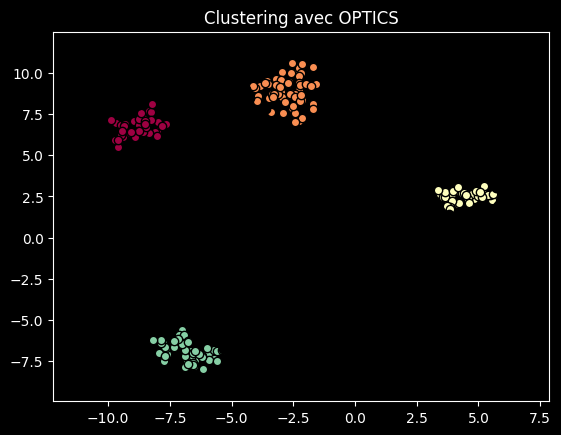

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
clustering.fit(X)

labels = clustering.labels_
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(set(labels)))]

for k, col in zip(set(labels), colors):
    if k == -1:
        col = [0, 0, 0, 1] 
    
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Clustering avec OPTICS')
plt.show()


Le graphe résultant de l'application de l'algorithme OPTICS montre comment les points de données ont été regroupés en clusters. Voici une explication du résultat :

- Points de données : Les petits cercles (marqués d'un "o") dans le graphe représentent les points de données de votre ensemble de données. Chaque point est situé à des coordonnées spécifiques sur le plan cartésien (axe x et axe y).

- Couleurs : Les points de données sont colorés en fonction de leur appartenance à un cluster particulier. Chaque couleur représente un cluster différent.

- Clusters : Vous pouvez voir comment les points de données sont répartis en clusters en fonction de leur proximité les uns avec les autres. Les points d'un même cluster sont proches les uns des autres.

- Clusters bruit (noise) : Les points noirs (marqués d'un "o" noir) représentent les points considérés comme du bruit (outliers) par l'algorithme OPTICS. Ce sont des points qui n'appartiennent à aucun cluster clairement défini en raison de leur éloignement par rapport aux autres points.

- Nombre de clusters : Le nombre total de clusters détectés est indiqué par le nombre de groupes de points colorés distincts.


---

# Algorithme Afinity propagation

L'algorithme Affinity Propagation (AP) est une technique de clustering qui ne nécessite pas de spécification préalable du nombre de clusters. Il identifie automatiquement les exemples les plus représentatifs comme centres de cluster, en se basant sur la notion d'affinité entre les points de données.
Voici comment fonctionne l'algorithme :

- Calcul des affinités : L'algorithme calcule les similitudes entre chaque paire de points dans vos données, créant ainsi une matrice d'affinité.

- Responsabilités et disponibilités : Il calcule deux valeurs pour chaque point : les responsabilités, qui mesurent à quel point un point préfère être le centre d'un cluster, et les disponibilités, qui mesurent à quel point un point est prêt à accepter un autre point comme centre.

- Exemplars : Les points avec des responsabilités élevées et des disponibilités élevées sont considérés comme des exemplars, c'est-à-dire des centres potentiels de clusters.

- Attribution des clusters : Les points sont attribués aux clusters en fonction de leur similarité avec les exemplars. Cela forme les clusters finaux.

- Avantages : AP ne nécessite pas de spécifier le nombre de clusters à l'avance, il gère naturellement des clusters de différentes tailles et peut découvrir des relations complexes entre les données.

- Inconvénients : Il peut être sensible aux paramètres, en particulier à la préférence, et peut être lent sur de grandes quantités de données.

Affinity Propagation est utile lorsque vous souhaitez laisser l'algorithme déterminer le nombre optimal de clusters et que vous avez des données complexes à clusteriser.

> Le code expliqué

- Importation des bibliothèques nécessaires :
```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
```


- Génération des données :
```python
X, _ = make_blobs(n_samples=74, centers=10, random_state=20)
```


- Application de Afinity propagation :
```python
clustering = AffinityPropagation()
clustering.fit(X)
```


- Visualisation des résultats
```python
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_
n_clusters_ = len(cluster_centers_indices)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(set(labels)))]

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

plt.title('Clustering avec Affinity Propagation')
plt.show()
```

> Le code executable


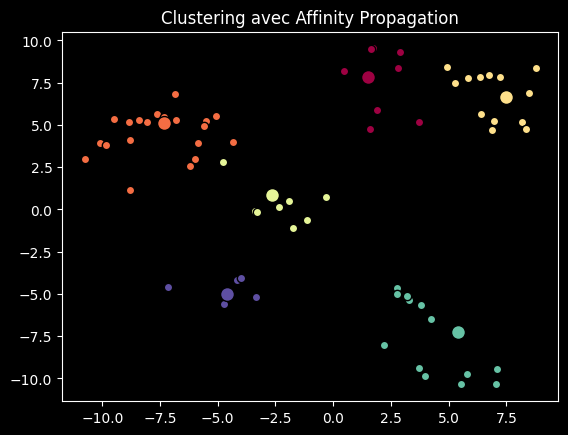

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=74, centers=10, random_state=20)

clustering = AffinityPropagation()
clustering.fit(X)

cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_
n_clusters_ = len(cluster_centers_indices)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(set(labels)))]

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

plt.title('Clustering avec Affinity Propagation')
plt.show()


Le graphe résultant de l'application de l'algorithme Affinity Propagation montre comment les points de données ont été regroupés en clusters. Voici une explication du résultat :

- Points de données : Les petits cercles (marqués d'un "o") dans le graphe représentent les points de données de votre ensemble de données. Chaque point est situé à des coordonnées spécifiques sur le plan cartésien (axe x et axe y).

- Centres de clusters : Les grands cercles (marqués d'un "o" plus gros) représentent les centres de clusters. Chaque centre est un point parmi vos données qui a été choisi comme le centre de son cluster respectif par l'algorithme Affinity Propagation.

- Couleurs : Les points de données sont colorés en fonction de leur appartenance à un cluster particulier. Chaque couleur représente un cluster différent.

- Nombre de clusters : Le nombre total de clusters détectés est indiqué par le nombre de centres de clusters (grands cercles).

- Répartition des clusters : Vous pouvez voir comment les points de données sont répartis en clusters en fonction de leur proximité les uns avec les autres. Les points d'un même cluster sont proches les uns des autres, et les centres de clusters (exemplars) sont positionnés au milieu de leurs clusters respectifs.


---